# Pre-processing - penguins Dataset

In [5]:
# Task 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
# Task 2: Data frame
raw_data = pd.read_csv('penguins.csv')

In [7]:
# Task 2: Data frame
raw_data.head()

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0


In [11]:
# Task 2: Statistics
raw_data.describe()

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,342.000000
mean,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,2008.035088
std,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,0.816938
min,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,2007.000000
25%,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,2007.000000
50%,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,2008.000000
75%,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,2009.000000
max,7197.000000,14.000000,124.300000,127.260000,231.000000,6300.000000,2009.000000


In [13]:
# Task 2: Data Frame info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   species                 333 non-null    object 
 1   island                  334 non-null    object 
 2   calorie requirement     344 non-null    int64  
 3   average sleep duration  344 non-null    int64  
 4   bill_length_mm          337 non-null    float64
 5   bill_depth_mm           333 non-null    float64
 6   flipper_length_mm       336 non-null    float64
 7   body_mass_g             339 non-null    float64
 8   gender                  327 non-null    object 
 9   year                    342 non-null    float64
dtypes: float64(5), int64(2), object(3)
memory usage: 27.0+ KB


In [15]:
raw_data

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.1,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.5,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.3,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
4,Adelie,Torgersen,4774,8,36.7,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.8,19.8,207.0,4000.0,male,2009.0
340,Chinstrap,Dream,4111,9,43.5,18.1,202.0,3400.0,female,2009.0
341,Chinstrap,Dream,7049,10,49.6,18.2,193.0,3775.0,male,2009.0
342,Chinstrap,Dream,4705,7,50.8,19.0,210.0,4100.0,male,2009.0


In [17]:
# Task 3: Handling Missing Values

df = raw_data.copy()

def calculate_median(col):
    sorted_col = sorted([value for value in col if value is not None])
    n = len(sorted_col)
    if n == 0:
        return None
    mid = n // 2
    return (sorted_col[mid] if n % 2 != 0 else (sorted_col[mid - 1] + sorted_col[mid]) / 2)

def calculate_mode(col):
    freq = {}
    for value in col:
        if value is not None:
            freq[value] = freq.get(value, 0) + 1
    return max(freq, key=freq.get) if freq else None

def fill_na(df):
    for col_name, col in df.items():
        if isinstance(col[0], (int, float, np.float64, np.int64)) or col[0] is None:
            median = calculate_median(col)
            fill_value = median
        else:
            fill_value = calculate_mode(col)
        df[col_name] = [fill_value if pd.isna(val) else val for val in col]

    return df

# Fill missing values in the dataset
df_filled = fill_na(df)

data = df_filled
data

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,39.10,18.7,181.0,3750.0,male,2007.0
1,Adelie,Torgersen,4890,14,39.50,17.4,186.0,3800.0,female,2007.0
2,Adelie,Torgersen,7184,11,40.30,18.0,195.0,3250.0,female,2007.0
3,Adelie,Torgersen,4169,8,46.85,13.2,202.5,992.0,male,2007.0
4,Adelie,Torgersen,4774,8,36.70,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,55.80,19.8,207.0,4000.0,male,2009.0
340,Chinstrap,Dream,4111,9,43.50,18.1,202.0,3400.0,female,2009.0
341,Chinstrap,Dream,7049,10,49.60,18.2,193.0,3775.0,male,2009.0
342,Chinstrap,Dream,4705,7,50.80,19.0,210.0,4100.0,male,2009.0


In [19]:
# Task 4: Handling String formats

def data_case_insensitive(data_case_sensitive):
    for column in data_case_sensitive.select_dtypes(include=['object']).columns:
        data_case_sensitive[column] = data_case_sensitive[column].str.lower()
    return data_case_sensitive

data_1 = data_case_insensitive(data)

In [21]:
# Task 5: Handling Outliers

def detect_outliers_in_column(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    score = Q3 - Q1
    bound_l = Q1 - 1.5*score
    bound_u = Q3 + 1.5*score
    median = column.median()
    column = np.where((column < bound_l) | (column > bound_u), median, column)

    return column

def detect_outliers_dataset(data_with_outliers):
    for column in data_with_outliers.select_dtypes(include=['float64','int64', 'int8']).columns:
        data_with_outliers[column]=detect_outliers_in_column(data_with_outliers[column])
    return data_with_outliers

data_2 = detect_outliers_dataset(data)
data_2

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,adelie,torgersen,6563.0,11.0,39.10,18.7,181.0,3750.0,male,2007.0
1,adelie,torgersen,4890.0,14.0,39.50,17.4,186.0,3800.0,female,2007.0
2,adelie,torgersen,7184.0,11.0,40.30,18.0,195.0,3250.0,female,2007.0
3,adelie,torgersen,4169.0,8.0,46.85,13.2,202.5,4050.0,male,2007.0
4,adelie,torgersen,4774.0,8.0,36.70,19.3,193.0,3450.0,female,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,chinstrap,dream,4826.0,11.0,55.80,19.8,207.0,4000.0,male,2009.0
340,chinstrap,dream,4111.0,9.0,43.50,18.1,202.0,3400.0,female,2009.0
341,chinstrap,dream,7049.0,10.0,49.60,18.2,193.0,3775.0,male,2009.0
342,chinstrap,dream,4705.0,7.0,50.80,19.0,210.0,4100.0,male,2009.0


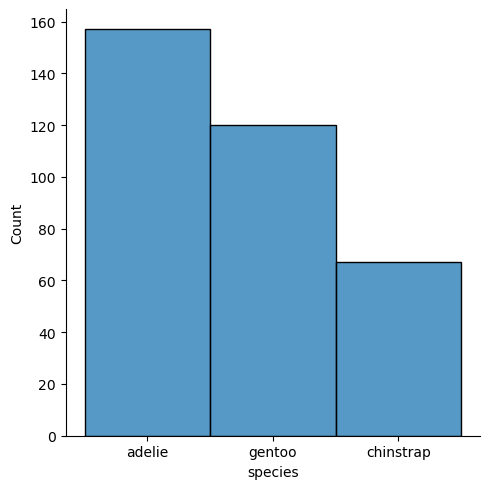

In [24]:
# Task 6: Data visualization

sns.displot(data=data_1, x="species")

[Text(0.5, 1.0, 'Detecting Outliers')]

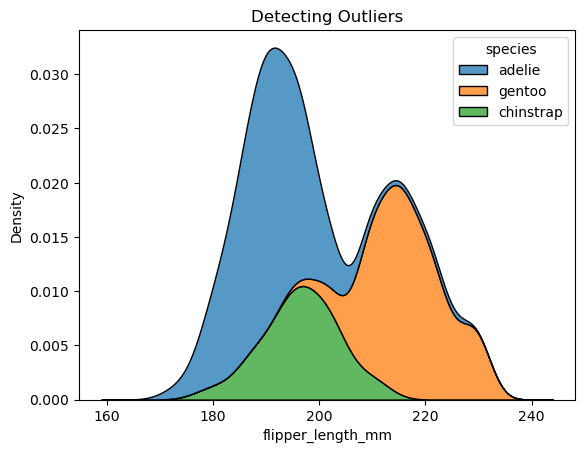

In [25]:
# Task 6: Data visualization

sns.kdeplot(data=data_1, x="flipper_length_mm", hue="species", multiple="stack").set(title='Detecting Outliers')

[Text(0.5, 1.0, 'Outlier free data')]

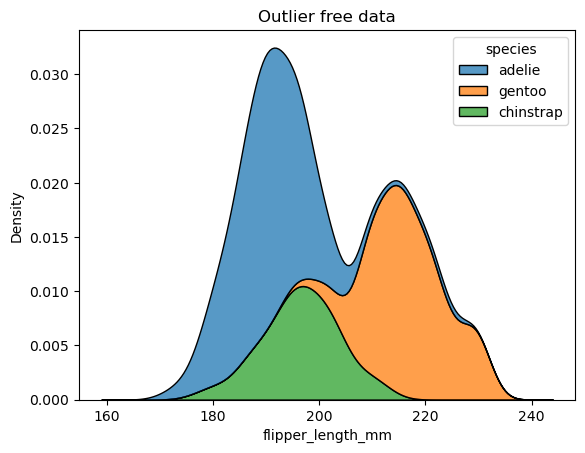

In [28]:
# Task 6: Data visualization

sns.kdeplot(data=data_2, x="flipper_length_mm", hue="species", multiple="stack").set(title='Outlier free data')

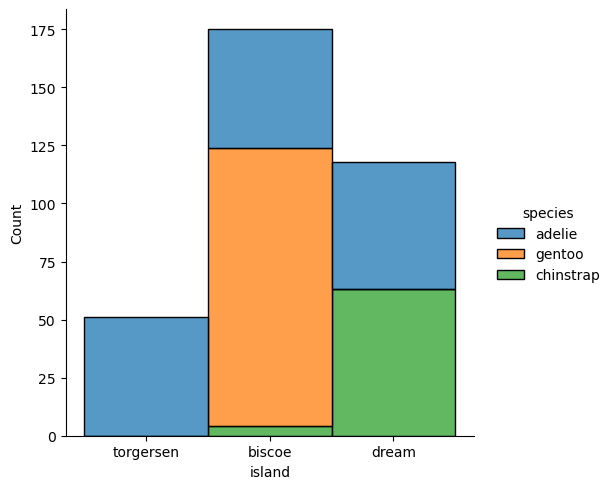

In [30]:
# Task 6: Data visualization

sns.displot(data=data_1, x="island", hue="species", multiple="stack")

In [23]:
# Task 8: Transform string to Categorical

data_2['species'] = pd.Categorical(data_2['species']).codes
data_2['island'] = pd.Categorical(data_2['island']).codes
data_2['gender'] = pd.Categorical(data_2['gender']).codes

data_2

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0,2,6563.0,11.0,39.10,18.7,181.0,3750.0,1,2007.0
1,0,2,4890.0,14.0,39.50,17.4,186.0,3800.0,0,2007.0
2,0,2,7184.0,11.0,40.30,18.0,195.0,3250.0,0,2007.0
3,0,2,4169.0,8.0,46.85,13.2,202.5,4050.0,1,2007.0
4,0,2,4774.0,8.0,36.70,19.3,193.0,3450.0,0,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,1,1,4826.0,11.0,55.80,19.8,207.0,4000.0,1,2009.0
340,1,1,4111.0,9.0,43.50,18.1,202.0,3400.0,0,2009.0
341,1,1,7049.0,10.0,49.60,18.2,193.0,3775.0,1,2009.0
342,1,1,4705.0,7.0,50.80,19.0,210.0,4100.0,1,2009.0


In [25]:
# Task 7: Plot function definition Identifying Correlation

def Plot_Correlation(data_set, name):
    matrix = data_set.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix, annot=True, cmap='coolwarm')
    plt.title(f'Correlation Matrix Heatmap: {name}')
    plt.show()
    return matrix

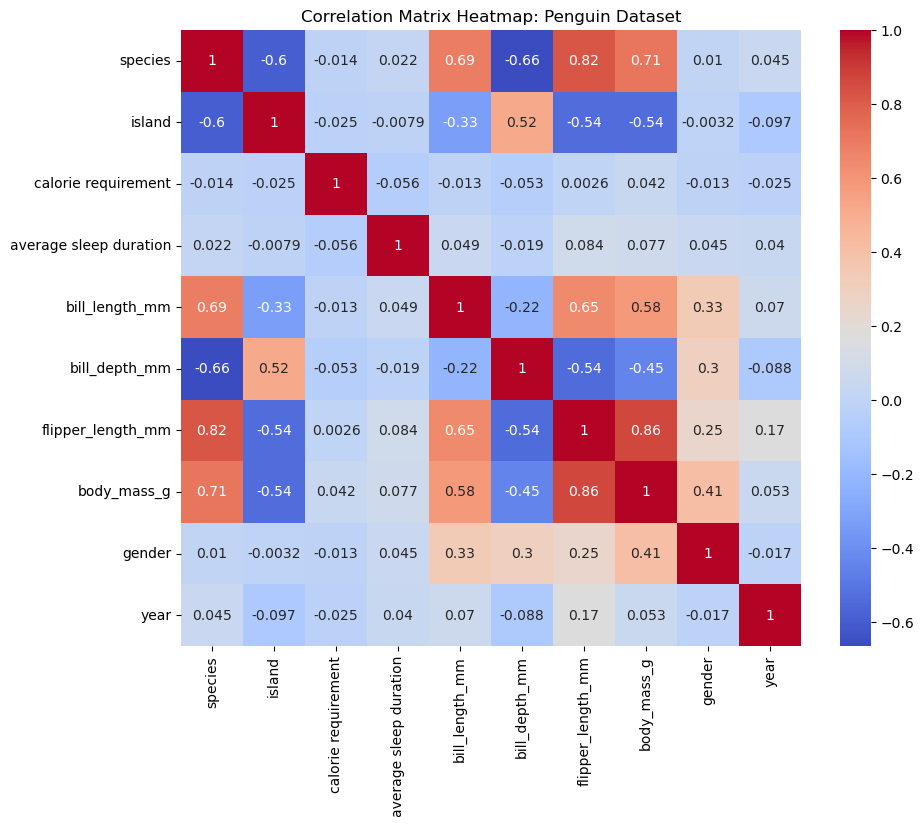

In [27]:
# Task 7: Correlation Plot

corr_matrix_penguin = Plot_Correlation(data_2, 'Penguin Dataset')

In [29]:
# Task 7: Identifying Correlated/Uncorrelated function definition
def uncorrelated_cols(matrix, col, filter):
    uncorrelated = []
    cols = matrix[col].sort_values(ascending=False)
    for i in range(len(cols)):
        if abs(cols[i]) < filter:
            uncorrelated.append(cols.keys()[i])
    return uncorrelated

In [31]:
# Task 7: Identifying Uncorrelated
uncorrelated_cols(corr_matrix_penguin, 'gender', 0.1)

/var/folders/ht/vhh4hxzn1614ncvj77svrnpr0000gn/T/ipykernel_16780/1827711445.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cols[i]) < filter:


['average sleep duration', 'species', 'island', 'calorie requirement', 'year']

In [33]:
# Task 9: Normalize Columns

def Normalize_column(column):
    min = column.min()
    max = column.max()
    return (column - min) / (max - min)

def Normalize_dataset(data_set):
    for column in data_set.columns:
        data_set[column] = Normalize_column(data_set[column])
    return data_set

print("Normalized DataFrame:")
data_3 = Normalize_dataset(data_2)
data_3

Normalized DataFrame:


,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,0.0,1.0,0.828324,0.571429,0.254545,0.666667,0.152542,0.291667,1.0,0.0
1,0.0,1.0,0.375305,1.000000,0.269091,0.511905,0.237288,0.305556,0.0,0.0
2,0.0,1.0,0.996480,0.571429,0.298182,0.583333,0.389831,0.152778,0.0,0.0
3,0.0,1.0,0.180070,0.142857,0.536364,0.011905,0.516949,0.375000,1.0,0.0
4,0.0,1.0,0.343894,0.142857,0.167273,0.738095,0.355932,0.208333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
339,0.5,0.5,0.357975,0.571429,0.861818,0.797619,0.593220,0.361111,1.0,1.0
340,0.5,0.5,0.164365,0.285714,0.414545,0.595238,0.508475,0.194444,0.0,1.0
341,0.5,0.5,0.959924,0.428571,0.636364,0.607143,0.355932,0.298611,1.0,1.0
342,0.5,0.5,0.325210,0.000000,0.680000,0.702381,0.644068,0.388889,1.0,1.0


# Part II: Logistic Regression using Gradient Descent

In [35]:
# Task 4: Defining function to Split training and testing data

def train_test_split(df, test_size=0.2, random_state=None):
    if random_state:
        np.random.seed(random_state)

    shuffled_df = df.sample(frac=1).reset_index(drop=True)

    split_index = int(len(shuffled_df) * (1 - test_size))
    train_df = shuffled_df.iloc[:split_index]
    test_df = shuffled_df.iloc[split_index:]

    return train_df, test_df

In [37]:
# Task 4: Splitting training and testing data -- penguin

df_penguin = data_3.copy()
train_df, test_df = train_test_split(df_penguin, test_size=0.2, random_state=42)

drop_columns = uncorrelated_cols(corr_matrix_penguin, 'gender', 0.1)
drop_columns.append('gender')

X_train = train_df.drop(columns=drop_columns) 
X_test = test_df.drop(columns=drop_columns)
y_train = train_df['gender']
y_test = test_df['gender']

/var/folders/ht/vhh4hxzn1614ncvj77svrnpr0000gn/T/ipykernel_16780/1827711445.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if abs(cols[i]) < filter:


In [39]:
# Task 5: Shapes of training and testing

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (275, 4)
y_train shape: (275,)
X_test shape: (69, 4)
y_test shape: (69,)


## Model Definition

In [41]:
# Task 6: Defining function to train model

class LogitRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None
        self.loss = []

    def sigmoid(self, z):
        exp_z = np.exp(-z)
        return 1 / (1 + exp_z)

    def cost(self, h, y):
        N = y.shape[0]
        a = y * np.log(h)
        b = (1 - y) * np.log(1 - h)
        return (-1 / N) * np.sum(a + b)

    def gradient_descent(self, X, y):
        N, num_features = X.shape
        self.weights = np.random.uniform(0, 1, num_features)
        self.bias = 0
        self.lossplot = []
        self.lossplotx = []
        
        for i in range(self.num_iterations):
            z = np.dot(X, self.weights) + self.bias
            h = self.sigmoid(z)
            delta = h - y
            dw = (1 / N) * np.dot(X.T, delta)
            db = (1 / N) * np.sum(delta)
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            loss = self.cost(h, y)
            self.loss.append(loss)
            self.lossplot.append(loss)
            self.lossplotx.append(i)
        plt.plot(self.lossplotx, self.lossplot)
        plt.legend(['learning_rate: 1e-3, iterations: 100000', 'learning_rate: 1e-2, iterations: 10000', 'learning_rate: 5e-3, iterations: 50000', 'learning_rate: 5e-3, iterations: 100000'])

    def fit(self, X, y):
        self.gradient_descent(X, y)

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        h = self.sigmoid(z)
        return np.where(h >= 0.5, 1, 0)

    def accuracy(self, y_true, y_pred):
        return np.mean(y_true == y_pred) * 100


Hyperparameters set 1: {'learning_rate': 0.01, 'iterations': 10000}
Accuracy: 85.51%
Final training loss: 0.5230

Hyperparameters set 2: {'learning_rate': 0.001, 'iterations': 100000}
Accuracy: 86.96%
Final training loss: 0.5222

Hyperparameters set 3: {'learning_rate': 0.005, 'iterations': 50000}
Accuracy: 89.86%
Final training loss: 0.4612

Hyperparameters set 4: {'learning_rate': 0.005, 'iterations': 100000}
Accuracy: 89.86%
Final training loss: 0.4265


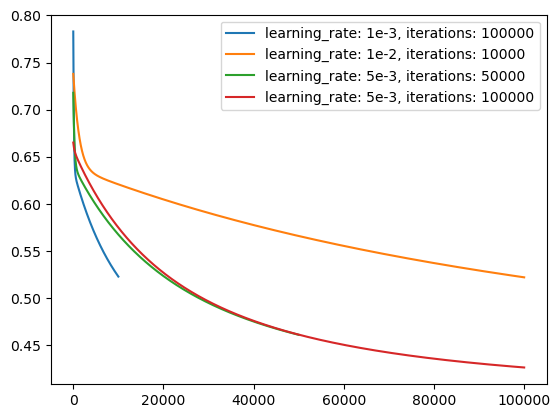

In [43]:
# Task 7: Training, Testing the model

hyperparams = [
    {"learning_rate": 1e-2, "iterations": 10000},
    {"learning_rate": 1e-3, "iterations": 100000},
    {"learning_rate": 5e-3, "iterations": 50000},
    {"learning_rate": 5e-3, "iterations": 100000},
]

for idx, params in enumerate(hyperparams):
    print(f"\nHyperparameters set {idx + 1}: {params}")
    model = LogitRegression(learning_rate=params["learning_rate"], num_iterations=params["iterations"])
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    test_accuracy = model.accuracy(y_test, y_pred_test)
    print(f"Accuracy: {test_accuracy:.2f}%")
    print(f"Final training loss: {model.loss[-1]:.4f}")


In [46]:
import pickle

with open('LogitRegression.pkl', 'wb') as file:
    pickle.dump(model, file)

### References

https://seaborn.pydata.org/tutorial/relational.html

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html

https://numpy.org/numpy-tutorials/

Assignment_0 final submission

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://www.geeksforgeeks.org/ml-handling-missing-values/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

https://www.geeksforgeeks.org/ml-feature-scaling-part-2/

https://www.geeksforgeeks.org/ml-one-hot-encoding/

https://www.geeksforgeeks.org/python-data-visualization-tutorial/

https://www.geeksforgeeks.org/data-preprocessing-machine-learning-python/

https://neptune.ai/blog/data-preprocessing-guide

https://www.kaggle.com/code/alirezahasannejad/data-preprocessing-in-machine-learning

https://www.mygreatlearning.com/blog/understanding-learning-rate-in-machine-learning/

https://www.geeksforgeeks.org/gradient-descent-algorithm-and-its-variants/

https://stats.stackexchange.com/questions/232983/why-slow-learning-rate-more-iterations-would-be-better-comparing-to-large-lear